### Linear Regression / Gradient Descent

The algorithm is used to find the `line` of best fit.  

Gradient descent is an `iterative` optimization algorithm that starts with an initial guess  
for the slope and the intercept and updates them in the direction of steepest descent of the `cost` function.  

The slope or `gradient` of a function in (x,y) point is the derivative.  
The cost function measures the `error` between the predicted and actual values.  

By `iteratively` updating the m and b values in the direction of the negative gradient,  
the algorithm finds the values that `minimize` the mean squared error.  

$ 
    f(x) = ax^2 \enspace then \enspace f'(x) = 2ax 
$

Best fit line for given data: 
 y = 0.6176946148762643x + 2.136116825825789


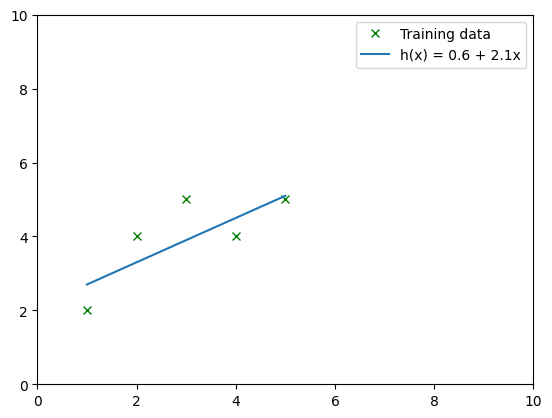

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Input raining dataset
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Initialize variables for the slope (m) and y-intercept (b) of the line
m = 0
b = 0

# Set the learning rate and the number of iterations for gradient descent
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent to find the best-fit line
for i in range(num_iterations):
    
    # Calculate the predicted values of y (y_pred) based on the current m and b
    y_pred = m*x + b

    # Calculate the error between the predicted values and the actual values
    error = y - y_pred 

    # Calculate the derivatives of the cost function with respect to m and b
    m_derivative = -(2/len(x)) * sum(x * error)
    b_derivative = -(2/len(x)) * sum(error)

    # Update the values of m and b using the gradient descent algorithm
    m = m - learning_rate * m_derivative
    b = b - learning_rate * b_derivative

# Output the equation of the best-fit line
print(f"Best fit line for given data: \n y = {m}x + {b}")

# Round the values of m and b for clarity
m = round(m, 1)
b = round(b, 1)

# Create a plot to visualize the data and the best-fit line
fig, ax = plt.subplots()
plt.ylim(0, 10)
plt.xlim(0, 10)

# Plot the data points as 'x' markers in green
ax.plot(x,  y,  'x', color='g', label='Training data')
ax.plot(x, m*x + b,  label=f'h(x) = {m} + {b}x')
plt.legend()
plt.show()

### Linear Regresssion / Predictions

Encapsulate algorithm into a `class` that fits training data and make predictions.

Best line: y = 0.6x + 2.1
Prediction for x=3: y = 3.9


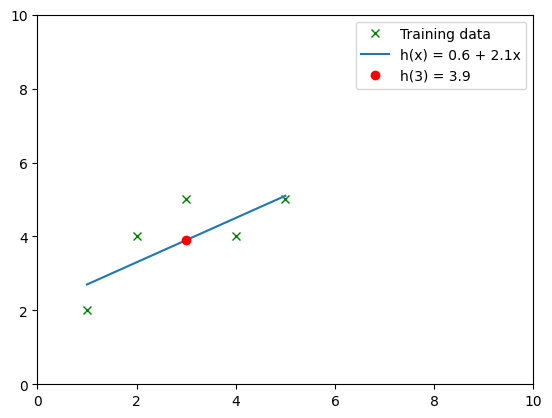

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Training datasets
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 5, 4, 5])

class LinearRegression:

    def __init__(self):
        self.coef_ = []
        self.intercept_ = 0

    def fit(self, X_train, Y_train, learning_rate=0.01, num_iterations=1000):
        
        x = X_train
        y = Y_train
        m = 0 
        b = 0
        for i in range(num_iterations):
            y_pred = m*x + b
            error = y - y_pred

            m_derivative = -(2/len(x)) * sum(x * error)
            b_derivative = -(2/len(x)) * sum(error)

            m -= learning_rate * m_derivative
            b -= learning_rate * b_derivative

        obj = LinearRegression()
        obj.coef_.append(m)
        obj.intercept_ = b
        
        return obj

# Learn a prediction function
r = LinearRegression().fit(X, Y)
m = r.coef_[0].round(1)
b = r.intercept_.round(1)

# Prediction
x1 = 3
y1 = m*x1 + b

# Output
print('Best line:', f"y = {m}x + {b}")
print('Prediction for x=3:', f"y = {y1:.1f}")

m = round(m, 1)
b = round(b, 1)

fig, ax = plt.subplots()
plt.ylim(0, 10)
plt.xlim(0, 10)

ax.plot(x,  y,  'x', color='g', label='Training data')
ax.plot(x, m*x + b,  label=f'h(x) = {m} + {b}x')
ax.plot(x1, y1, 'o', color='r', label=f'h({x1}) = {y1}') # Draw unknown point
plt.legend()
plt.show()